<a href="https://colab.research.google.com/github/Dhannai/Pescadero/blob/master/Datos_Pescadero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wind data


---
Plotted wind speed and direction from the Campbell Scientific CR200 meteorological station.
*   *Direction has been changed to 0 when speed is 0.*
*   *Speed is amplified 50 times.*
*   *Speed data has been "softened" with the moving average.*

**Next step:** Find a way to import time and date





In [6]:
import numpy as np
import matplotlib


In [7]:
def importar(nombre):
  dt=np.dtype([("TIMESTAMP",str),("RECORD",int),("WS_ms_S_WVT",float),("WindDir_D1_WVT",float),("WindDir_SD1_WVT",float),("AirTC_Avg",float),("RH",float)])
  data = np.loadtxt(nombre,dt,delimiter=',', skiprows=4)
  N=len(data)
  lista=np.zeros((N,7))
  for i in range(N):
    for j in range(1,7):
      d=data[i]
      lista[i,j]=d[j]
  return lista

In [8]:
#'CR200Series_sixmin_pescadero_20111027.dat'
import glob
archivos = glob.glob('*.dat')
print(archivos)

['CR200Series_sixmin_pescadero_20120605.dat', 'CR200Series_sixmin_pescadero_20120301.dat', 'CR200Series_sixmin_pescadero_20111027.dat', 'CR200Series_sixmin_pescadero_20120419.dat']


In [9]:
#Array datos debe ser de 1 columna y n debe ser entero par
def media_movil(datos,n):
  N=len(datos)
  z=np.zeros((N,1))
  for i in range(N):
    suma=0
    if i>=n/2 and i<=N-n/2:
      for j in np.arange(i-n/2 , i+n/2,dtype=int):
        suma+=datos[j]
      prom=suma/n
    if i<n/2:
      for j in np.arange(0,i+n/2,dtype=int):
        suma+=datos[j]
      prom=suma/len(np.arange(0,i+n/2))
    if i>N-n/2:
      for j in np.arange(i-n/2 , N,dtype=int):
        suma+=datos[j]
      prom=suma/len(np.arange(i-n/2 , N))
    z[i]=prom
  return z

In [10]:
datos1=importar(archivos[0])
datos2=importar(archivos[1])
datos3=importar(archivos[2])
datos4=importar(archivos[3])

In [11]:
data1=media_movil(datos1[:,2],100)
data2=media_movil(datos2[:,2],100)
data3=media_movil(datos3[:,2],100)
data4=media_movil(datos4[:,2],100)

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

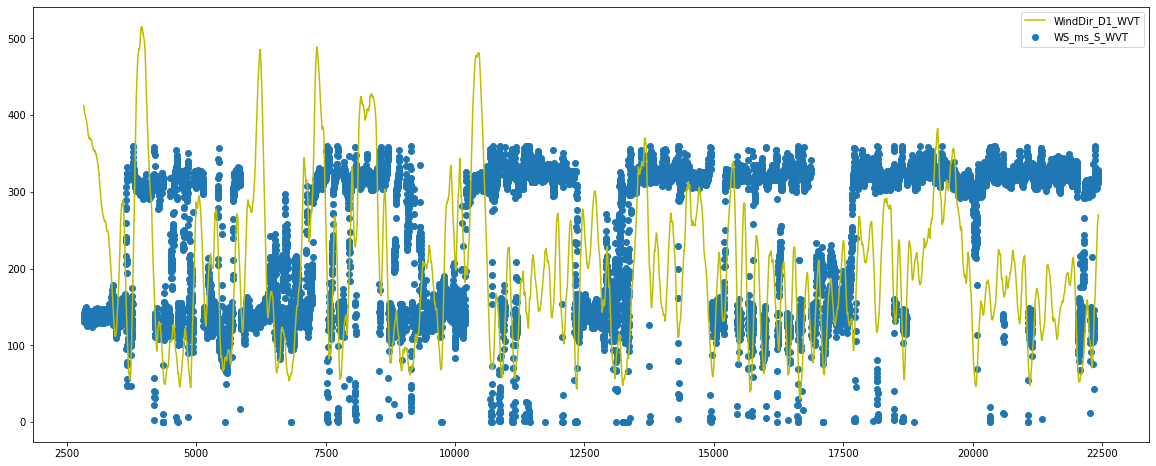

In [23]:
plt.figure(figsize=(20,8))
plt.scatter(datos1[:,1],datos1[:,3])
plt.plot(datos1[:,1],data1*50,'y');
plt.legend(["WindDir_D1_WVT","WS_ms_S_WVT"]);

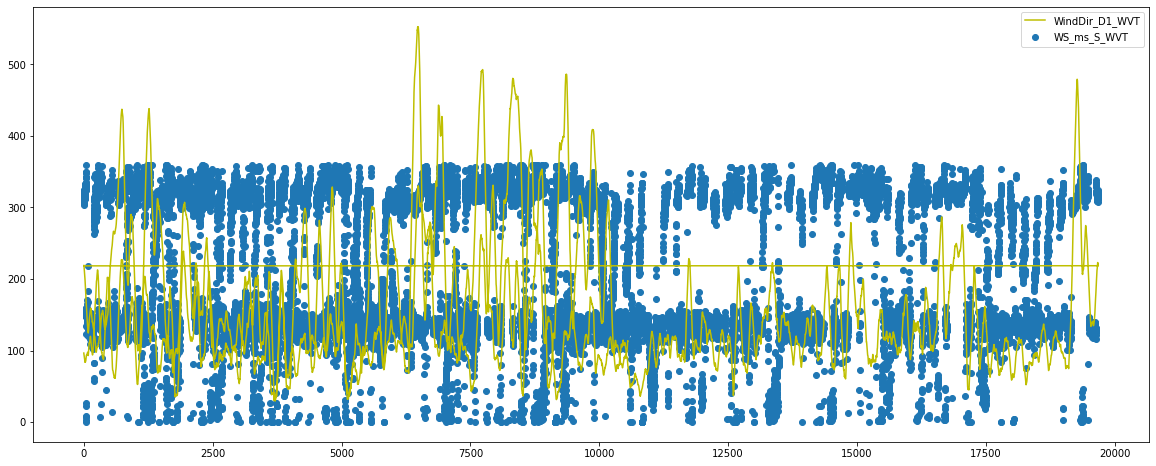

In [24]:
plt.figure(figsize=(20,8))
plt.scatter(datos2[:,1],datos2[:,3])
plt.plot(datos2[:,1],data2*50,'y');
plt.legend(["WindDir_D1_WVT","WS_ms_S_WVT"]);

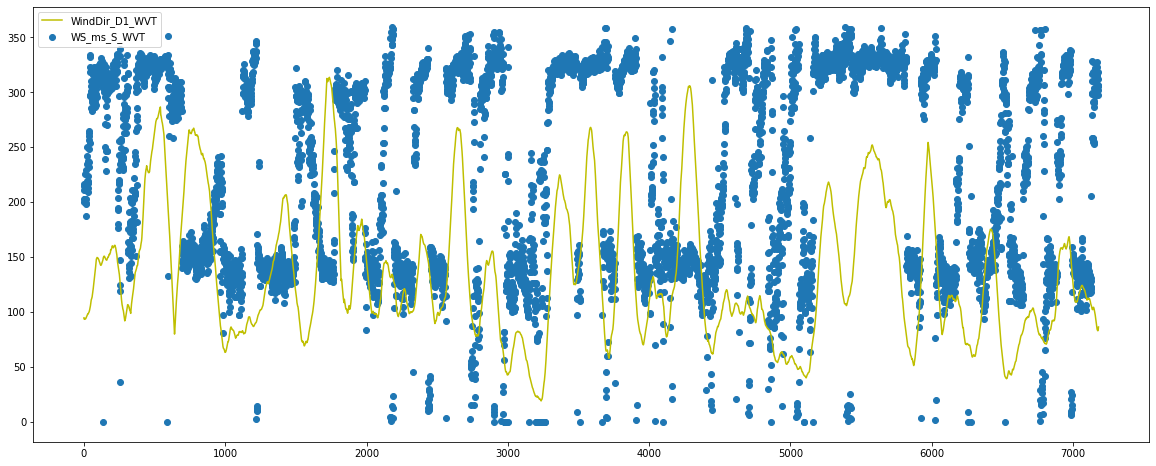

In [25]:
plt.figure(figsize=(20,8))
plt.scatter(datos3[:,1],datos3[:,3])
plt.plot(datos3[:,1],data3*50,'y');
plt.legend(["WindDir_D1_WVT","WS_ms_S_WVT"]);

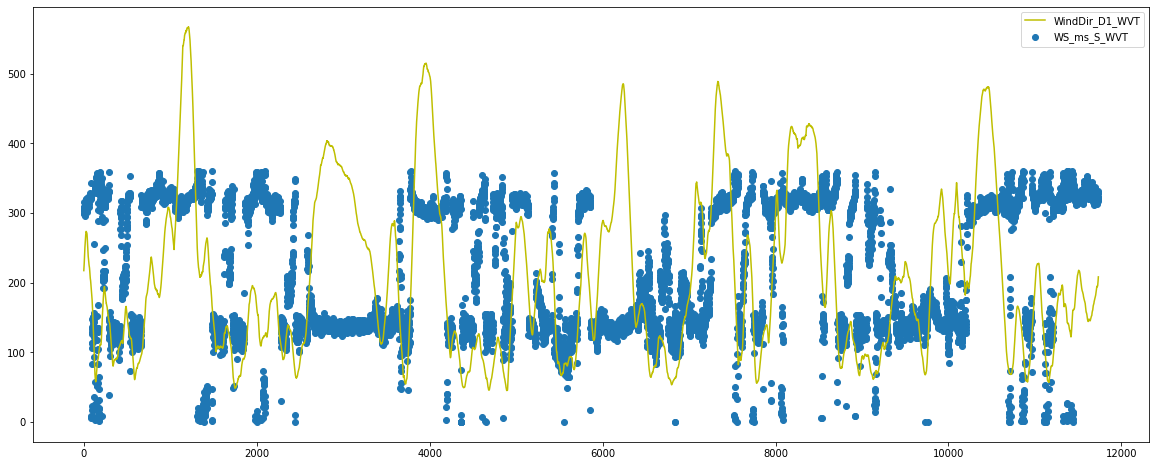

In [26]:
plt.figure(figsize=(20,8))
plt.scatter(datos4[:,1],datos4[:,3])
plt.plot(datos4[:,1],data4*50,'y');
plt.legend(["WindDir_D1_WVT","WS_ms_S_WVT"]);

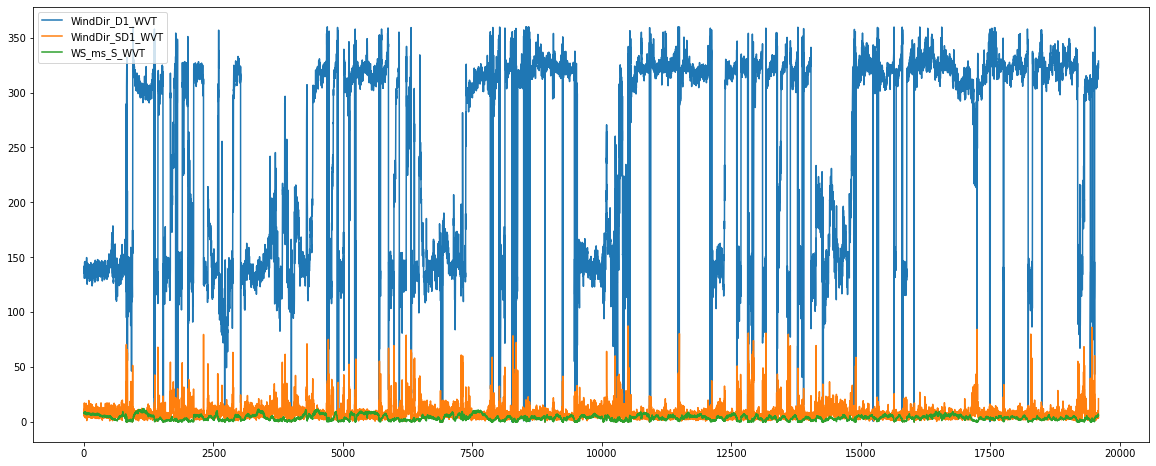

In [17]:
plt.figure(figsize=(20,8))
plt.plot(datos1[:,3]);
plt.plot(datos1[:,4]);
plt.plot(datos1[:,2]);
plt.legend(["WindDir_D1_WVT","WindDir_SD1_WVT","WS_ms_S_WVT"]);

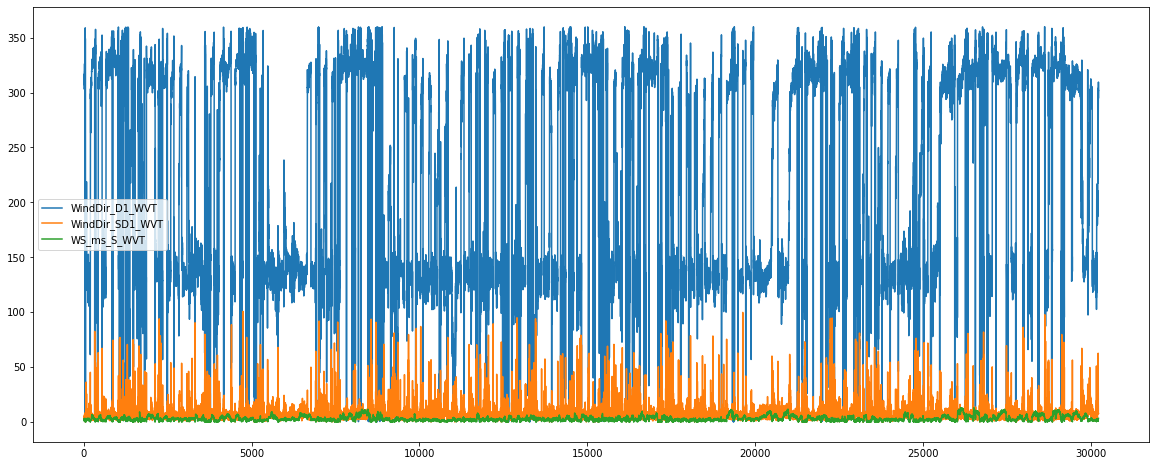

In [18]:
plt.figure(figsize=(20,8))
plt.plot(datos2[:,3]);
plt.plot(datos2[:,4]);
plt.plot(datos2[:,2]);
plt.legend(["WindDir_D1_WVT","WindDir_SD1_WVT","WS_ms_S_WVT"]);

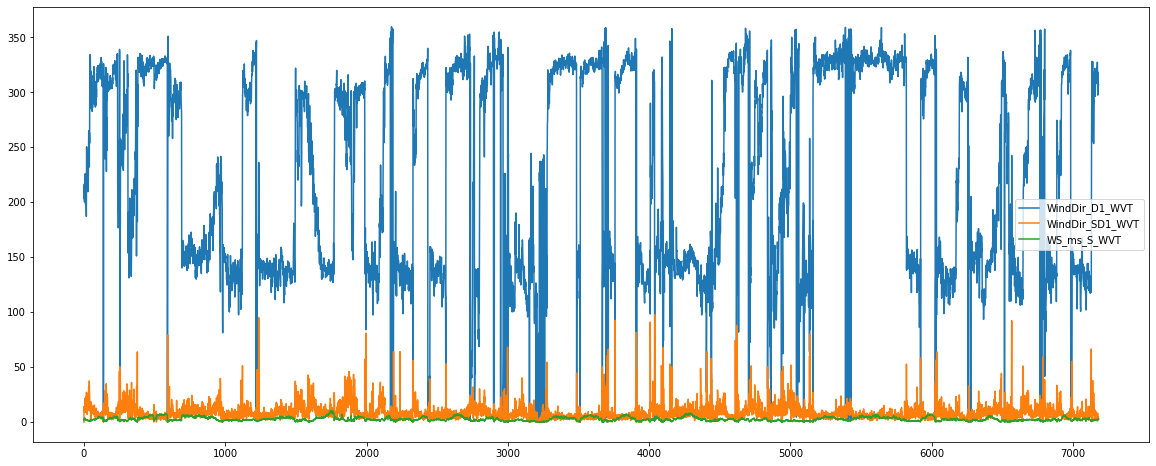

In [19]:
plt.figure(figsize=(20,8))
plt.plot(datos3[:,3]);
plt.plot(datos3[:,4]);
plt.plot(datos3[:,2]);
plt.legend(["WindDir_D1_WVT","WindDir_SD1_WVT","WS_ms_S_WVT"]);